# Dependency

In [ ]:
from scipy.stats import spearmanr
from sklearn.linear_model import Ridge, RidgeClassifier
from sklearn.neural_network import MLPRegressor 
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import KFold, train_test_split
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd
import pickle
import random
from sklearn.linear_model import Ridge
from IPython.display import display, HTML
import json

In [ ]:
random.seed(42)
np.random.seed(42)

# Figure 2

meta-llama/Llama-2-7b-chat-hf
0.8535965371025109


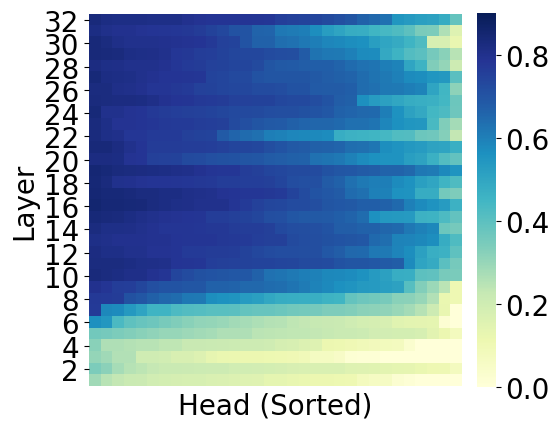

Top accuracy heads
[[15 17]
 [16 10]
 [18  3]
 [15  1]
 [17 19]
 [15  8]
 [26  4]
 [16 18]
 [14 25]
 [16 22]
 [18 11]
 [23  4]
 [15 23]
 [15 24]
 [20 18]
 [28  2]
 [29 10]
 [20  7]
 [28 25]
 [ 9 11]]
Top accuracy
[0.85359654 0.84443151 0.84409103 0.84373117 0.84277784 0.84061661
 0.83986761 0.83942969 0.83855741 0.83708709 0.837037   0.83694683
 0.83685165 0.83470212 0.83439276 0.83404687 0.83401791 0.83376149
 0.83289149 0.83250907]
mistralai/Mistral-7B-Instruct-v0.1
0.8462606929565305


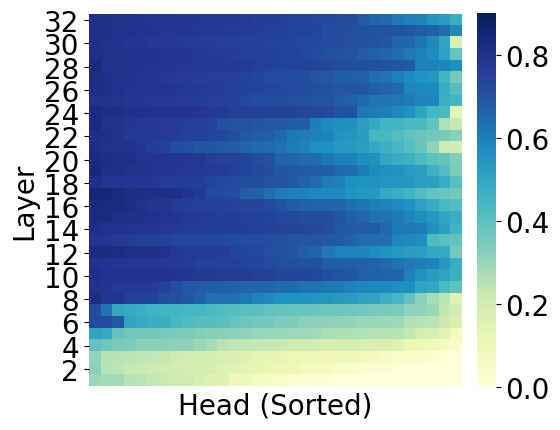

Top accuracy heads
[[16  2]
 [16  0]
 [18  6]
 [27 16]
 [15  2]
 [16  8]
 [15  4]
 [14 10]
 [22 22]
 [11 31]
 [14 14]
 [15  5]
 [19 31]
 [23 18]
 [ 7 31]
 [11 30]
 [11 28]
 [25 12]
 [15  7]
 [19  0]]
Top accuracy
[0.84626069 0.84529552 0.83807667 0.83054947 0.829963   0.82876167
 0.82718748 0.82651197 0.82629493 0.82616408 0.82564882 0.82445263
 0.82358419 0.82285075 0.82211302 0.82067125 0.81669982 0.81655599
 0.81601361 0.81527832]
lmsys/vicuna-7b-v1.5
0.8611702616552759


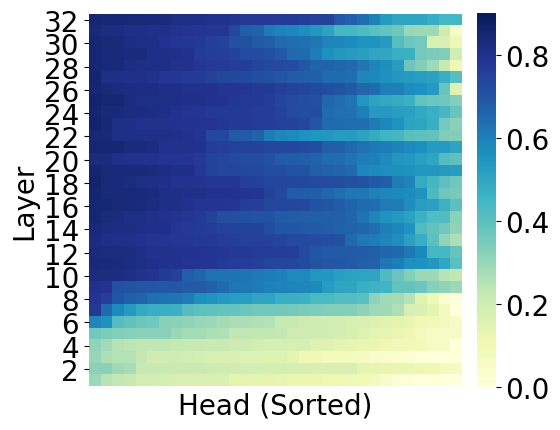

Top accuracy heads
[[24  7]
 [22 12]
 [17 19]
 [26  4]
 [16 10]
 [18 13]
 [23  4]
 [20  7]
 [29 24]
 [14 25]
 [15 17]
 [27  7]
 [31 27]
 [25 28]
 [15  1]
 [28  2]
 [24 13]
 [20 18]
 [24 23]
 [20 17]]
Top accuracy
[0.86117026 0.86094609 0.85928158 0.85330131 0.85278976 0.85225937
 0.85089665 0.85034814 0.84986726 0.84898512 0.84773457 0.8468182
 0.8465632  0.84645476 0.84626455 0.84614283 0.84481465 0.8446778
 0.84464868 0.84445135]


In [4]:
cnt = 0
for model_name in ['meta-llama/Llama-2-7b-chat-hf', 'mistralai/Mistral-7B-Instruct-v0.1', 'lmsys/vicuna-7b-v1.5']:
    print(model_name)
    performance = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_performance.pkl", 'rb'))
    print(performance.max())
    plt.rcParams.update({'font.size': 20})
    plt.figure(figsize=(6, 6))
    norm = mcolors.Normalize(vmin=0, vmax=.9)
    plt.imshow(np.sort(performance[::-1, :]*(-1), axis=1)*(-1), cmap='YlGnBu', norm=norm)
    plt.grid(False)
    plt.xlabel("Head (Sorted)")
    plt.ylabel("Layer")
    plt.xticks([])
    plt.yticks(range(0,32,2), [i for i in range(32,0,-2)])
    cbar = plt.colorbar(orientation='vertical', fraction=0.0459, pad=0.04)
    cbar.outline.set_visible(False)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"./figure_replication/{model_name.replace('/','_')}_layer_head_accuracy.pdf")
    plt.show()
    
    print("Top accuracy heads")
    top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-20:, :][::-1]
    print(top_indices)
    print("Top accuracy")
    print(performance[top_indices[:, 0], top_indices[:, 1]])
    cnt += 1

# Figure 3

## Panel A

meta-llama/Llama-2-7b-chat-hf 32 0.8702568082208475


([Text(0.17585571526882604, 0.9287974801679892, 'Rand Paul (R-KY)'),
  Text(0.5728848152555395, 0.9287974801679892, 'Mike Lee (R-AZ)'),
  Text(0.2700308160238838, 0.24779748016798897, 'Lisa Murkowski (R-AK)'),
  Text(-0.3804021982302933, -0.20119832011199246, 'Max Rose (D-NY)'),
  Text(-0.5379091415746585, -0.2728016798880071, 'Ilhan Omar (D-MN)'),
  Text(-0.12320261889820783, -0.7573994400373306, 'Elizabeth Warren (D-MA)'),
  Text(-0.23959918058714558, -0.671202519832011, 'Kamala Harris (D-CA)'),
  Text(0.3132831914172698, -0.06539944003733078, 'Joe Manchin (D-WV)'),
  Text(0.403165696680728, 0.1557974801679891, 'Susan Collins (R-ME)')],
 [Text(0.17585571526882604, 0.9287974801679892, ''),
  Text(0.5728848152555395, 0.9287974801679892, ''),
  Text(0.2700308160238838, 0.24779748016798897, ''),
  Text(-0.3804021982302933, -0.20119832011199246, ''),
  Text(-0.5379091415746585, -0.2728016798880071, ''),
  Text(-0.12320261889820783, -0.7573994400373306, ''),
  Text(-0.23959918058714558, -0

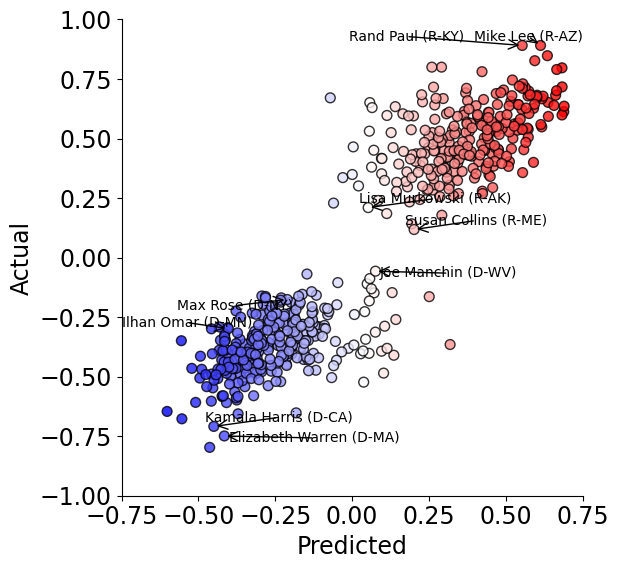

In [151]:
import matplotlib.colors as mcolors
from adjustText import adjust_text

cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])

model_name = 'meta-llama/Llama-2-7b-chat-hf'
k = 32
features, labels = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_features.pkl", 'rb'))
performance = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_performance.pkl", 'rb'))
top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-k:, :]
kf = KFold(n_splits=2, shuffle=True, random_state=42)
ensemble_pred = np.zeros(labels.shape)
for train_indices, test_indices in kf.split(range(features.shape[0])):
    for i, j in top_indices:
        X_train = features[train_indices, 0, i, j, :]
        X_test = features[test_indices, 0, i, j, :]
        y_train = np.array(labels)[train_indices]
        y_test = np.array(labels)[test_indices]
        ridge_model = Ridge(alpha=1, fit_intercept=False)
        ridge_model.fit(X_train, y_train)
        y_pred = ridge_model.predict(X_test)
        ensemble_pred[test_indices] += y_pred
ensemble_pred = ensemble_pred / k
print(model_name, k, spearmanr(labels, ensemble_pred).statistic)
plt.rcParams.update({'font.size': 17})
plt.figure(figsize=(6.5, 6))
plt.grid(False)
plt.title(f"")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(ensemble_pred, labels, c = ensemble_pred, cmap=cmap, alpha=0.8, s=50, edgecolor='black') #, norm=norm
plt.xlim(-0.75, 0.75)
plt.ylim(-1, 1)
plt.xticks(np.arange(-.75,1,0.25))
plt.yticks(np.arange(-1,1.25,0.25))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('llama2_pol.pdf')
highlight_points = {
    "Rand Paul (R-KY)": (ensemble_pred[485], labels[485]),
    "Mike Lee (R-AZ)": (ensemble_pred[538], labels[538]),
    "Lisa Murkowski (R-AK)": (ensemble_pred[452], labels[452]),
    "Max Rose (D-NY)": (ensemble_pred[285], labels[285]),
    "Ilhan Omar (D-MN)": (ensemble_pred[223], labels[223]),
    "Elizabeth Warren (D-MA)": (ensemble_pred[493], labels[493]),
    "Kamala Harris (D-CA)": (ensemble_pred[459], labels[459]),
    "Joe Manchin (D-WV)": (ensemble_pred[547], labels[547]),
    "Susan Collins (R-ME)": (ensemble_pred[489], labels[489])
}

texts = []
for label, (xi, yi) in highlight_points.items():
    text = plt.annotate(label, (xi, yi), fontsize=10, ha='center')
    texts.append(text)
adjust_text(texts, arrowprops=dict(arrowstyle="->", color='black'), expand_points=(20, 30))


## Panel B

meta-llama/Llama-2-7b-chat-hf 32 0.798377452150574


([Text(0.4118898574413029, 0.2980564888534274, 'Fox News'),
  Text(0.4133303914988603, 0.7615602183272496, 'InfoWars'),
  Text(0.38447463753089617, 0.38726804686536465, 'The Blaze'),
  Text(0.16857926780611787, 0.13802624207205771, 'The Center Square'),
  Text(-0.11949141753216197, -0.17642983333618756, 'New York Times'),
  Text(-0.28155059490998713, -0.2679952050750196, 'HuffPost'),
  Text(-0.08994190348066522, -0.2677417990815507, 'Essence'),
  Text(-0.2606904081287158, -0.44133712803192293, 'Salon'),
  Text(0.2017971306628802, -0.06301488190680637, 'BroBible'),
  Text(0.2066218377127068, 0.4791315025877467, 'newsmax')],
 [Text(0.4118898574413029, 0.2980564888534274, ''),
  Text(0.4133303914988603, 0.7615602183272496, ''),
  Text(0.38447463753089617, 0.38726804686536465, ''),
  Text(0.16857926780611787, 0.13802624207205771, ''),
  Text(-0.11949141753216197, -0.17642983333618756, ''),
  Text(-0.28155059490998713, -0.2679952050750196, ''),
  Text(-0.08994190348066522, -0.26774179908155

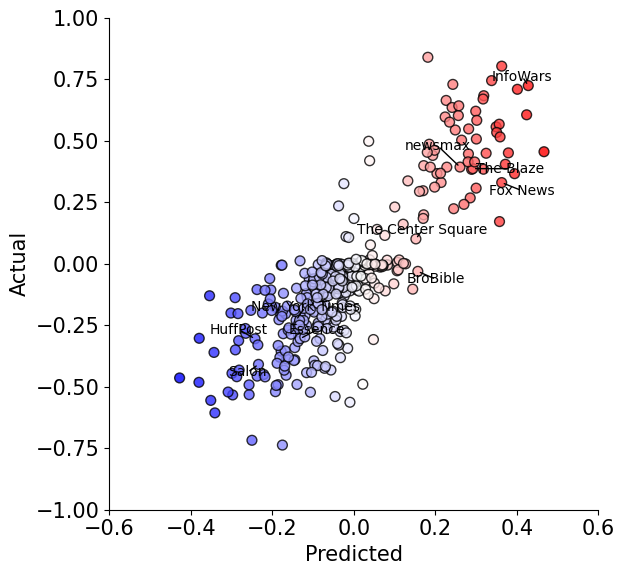

In [ ]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])

model_name = 'meta-llama/Llama-2-7b-chat-hf'
k = 32
featuresnews, labelsnews = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_news_features.pkl", 'rb'))
features, labels = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_features.pkl", 'rb'))
performance = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_performance.pkl", 'rb'))
top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-k:, :]
kf = KFold(n_splits=2, shuffle=True, random_state=42)
ensemble_pred = np.zeros(labelsnews.shape)
for train_indices, test_indices in kf.split(range(features.shape[0])):
    for i, j in top_indices:
        X_train = features[train_indices, 0, i, j, :]
        X_test = features[test_indices, 0, i, j, :]
        y_train = np.array(labels)[train_indices]
        y_test = np.array(labels)[test_indices]
        ridge_model = Ridge(alpha=1, fit_intercept=False)
        ridge_model.fit(X_train, y_train)
        y_pred = ridge_model.predict(featuresnews[:, 0, i, j, :])
        ensemble_pred += y_pred
ensemble_pred = ensemble_pred / k / 2
print(model_name, k, spearmanr(labelsnews, ensemble_pred).statistic)
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(6.5, 6))
plt.grid(False)
plt.title(f"")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.scatter(ensemble_pred, labelsnews, c = ensemble_pred, cmap=cmap, alpha=0.8, s=50, edgecolor='black') #, norm=norm
plt.xlim(-0.6, 0.6)
plt.ylim(-1, 1)
#plt.xticks(np.arange(-1,1.25,0.25))
plt.yticks(np.arange(-1,1.25,0.25))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.savefig('llama2_news.pdf')


# Figure A1

meta-llama/Llama-2-7b-chat-hf 32 0.8702568082208475
mistralai/Mistral-7B-Instruct-v0.1 32 0.8636398539100497
lmsys/vicuna-7b-v1.5 32 0.885120680055387


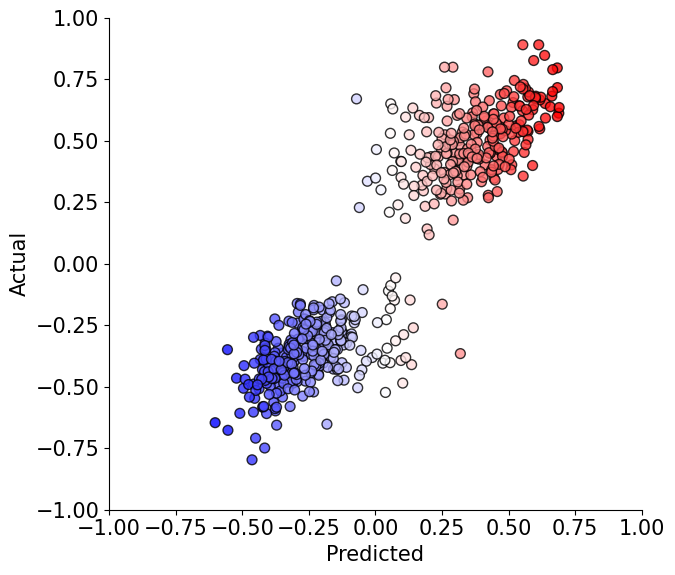

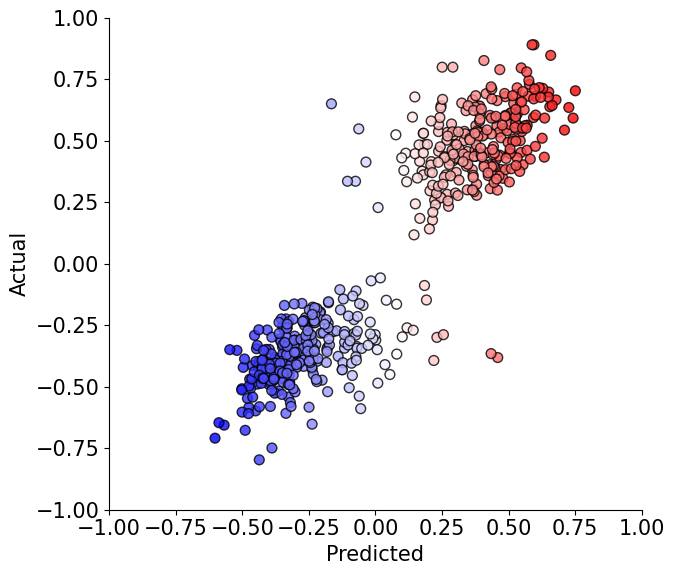

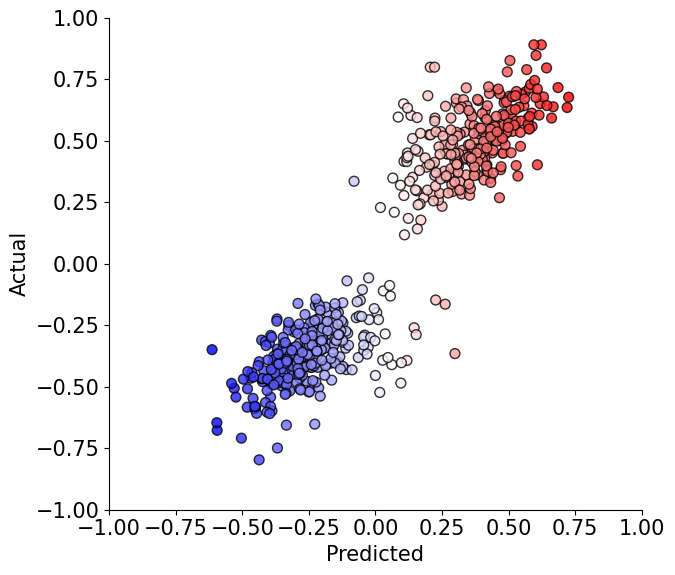

In [170]:
import matplotlib.colors as mcolors
from adjustText import adjust_text

cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])

for model_name in ['meta-llama/Llama-2-7b-chat-hf', 'mistralai/Mistral-7B-Instruct-v0.1', 'lmsys/vicuna-7b-v1.5']:
    k = 32
    features, labels = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_features.pkl", 'rb'))
    performance = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_performance.pkl", 'rb'))
    top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-k:, :]
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    ensemble_pred = np.zeros(labels.shape)
    for train_indices, test_indices in kf.split(range(features.shape[0])):
        for i, j in top_indices:
            X_train = features[train_indices, 0, i, j, :]
            X_test = features[test_indices, 0, i, j, :]
            y_train = np.array(labels)[train_indices]
            y_test = np.array(labels)[test_indices]
            ridge_model = Ridge(alpha=1, fit_intercept=False)
            ridge_model.fit(X_train, y_train)
            y_pred = ridge_model.predict(X_test)
            ensemble_pred[test_indices] += y_pred
    ensemble_pred = ensemble_pred / k
    print(model_name, k, spearmanr(labels, ensemble_pred).statistic)
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(7, 6))
    plt.grid(False)
    plt.title(f"")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.scatter(ensemble_pred, labels, c = ensemble_pred, cmap=cmap, alpha=0.8, s=50, edgecolor='black') #, norm=norm
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.xticks(np.arange(-1,1.25,0.25))
    plt.yticks(np.arange(-1,1.25,0.25))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.tight_layout()
    plt.savefig(f"./figure_replication/{model_name.replace('/','_')}_lawmaker.pdf")


# Figure A2

meta-llama/Llama-2-7b-chat-hf 32 0.798377452150574
mistralai/Mistral-7B-Instruct-v0.1 32 0.7635392206027716
lmsys/vicuna-7b-v1.5 32 0.7199603996004295


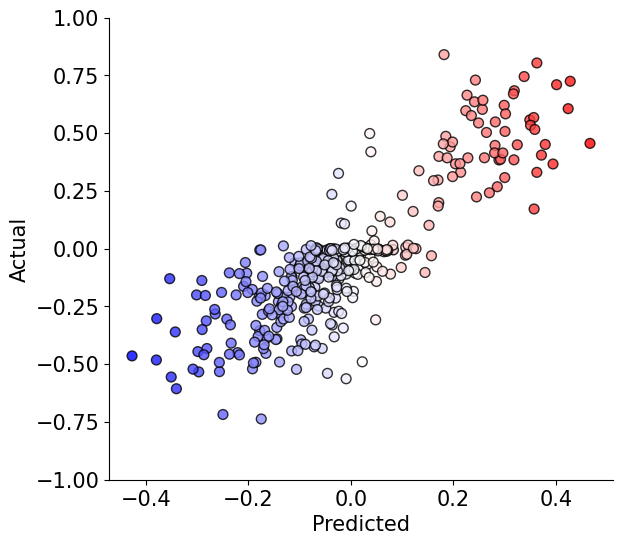

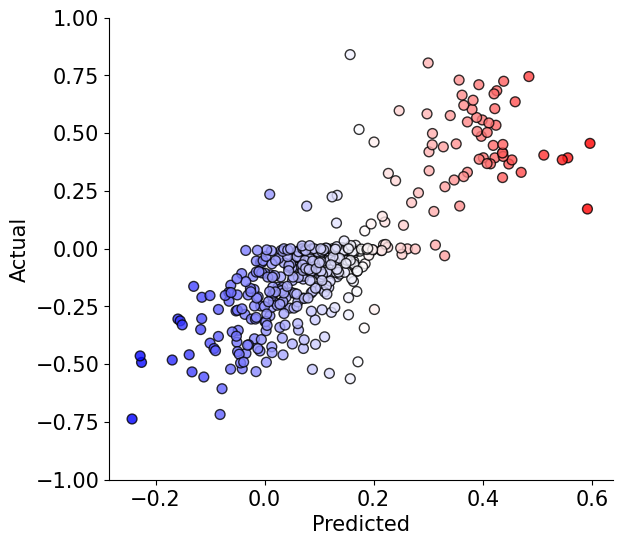

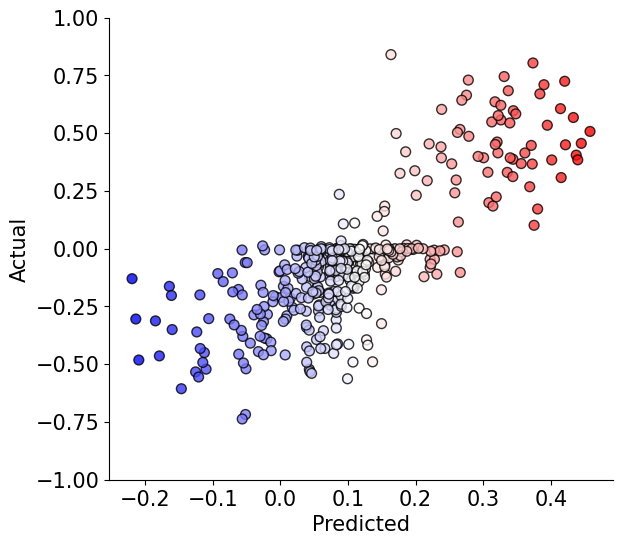

In [171]:
import matplotlib.colors as mcolors
cmap = mcolors.LinearSegmentedColormap.from_list("red_white_blue", ["blue", "white", "red"])

for model_name in ['meta-llama/Llama-2-7b-chat-hf', 'mistralai/Mistral-7B-Instruct-v0.1', 'lmsys/vicuna-7b-v1.5']:
    k = 32
    featuresnews, labelsnews = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_news_features.pkl", 'rb'))
    features, labels = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_features.pkl", 'rb'))
    performance = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_performance.pkl", 'rb'))
    top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-k:, :]
    kf = KFold(n_splits=2, shuffle=True, random_state=42)
    ensemble_pred = np.zeros(labelsnews.shape)
    for train_indices, test_indices in kf.split(range(features.shape[0])):
        for i, j in top_indices:
            X_train = features[train_indices, 0, i, j, :]
            X_test = features[test_indices, 0, i, j, :]
            y_train = np.array(labels)[train_indices]
            y_test = np.array(labels)[test_indices]
            ridge_model = Ridge(alpha=1, fit_intercept=False)
            ridge_model.fit(X_train, y_train)
            y_pred = ridge_model.predict(featuresnews[:, 0, i, j, :])
            ensemble_pred += y_pred
    ensemble_pred = ensemble_pred / k / 2
    print(model_name, k, spearmanr(labelsnews, ensemble_pred).statistic)
    plt.rcParams.update({'font.size': 15})
    plt.figure(figsize=(6.5, 6))
    plt.grid(False)
    plt.title(f"")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.scatter(ensemble_pred, labelsnews, c = ensemble_pred, cmap=cmap, alpha=0.8, s=50, edgecolor='black') #, norm=norm
    #plt.xlim(-0.6, 0.6)
    plt.ylim(-1, 1)
    #plt.xticks(np.arange(-1,1.25,0.25))
    plt.yticks(np.arange(-1,1.25,0.25))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.savefig(f"./figure_replication/{model_name.replace('/','_')}_news.pdf")


# Figure A3

meta-llama/Llama-2-7b-chat-hf
original 0.8535965371025109 [15, 17]


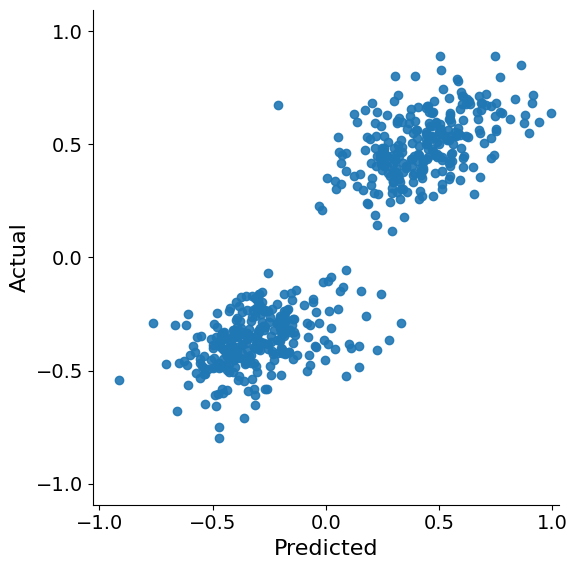

meta-llama/Llama-2-7b-chat-hf
random 0.13114482397015811 [30, 22]


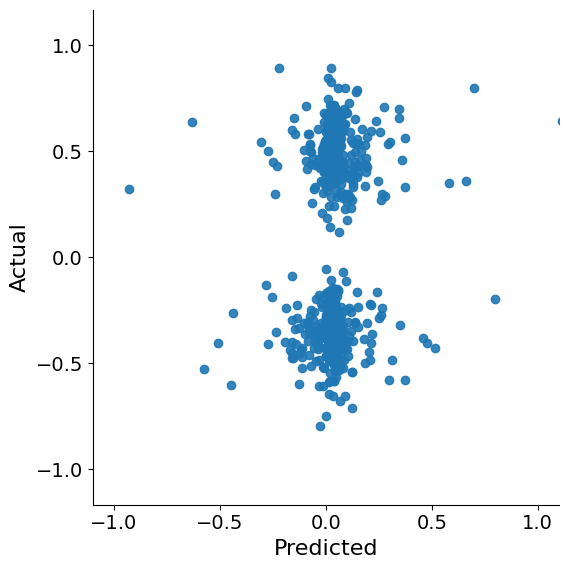

meta-llama/Llama-2-7b-chat-hf
sin 0.5506053310976751 [25, 28]


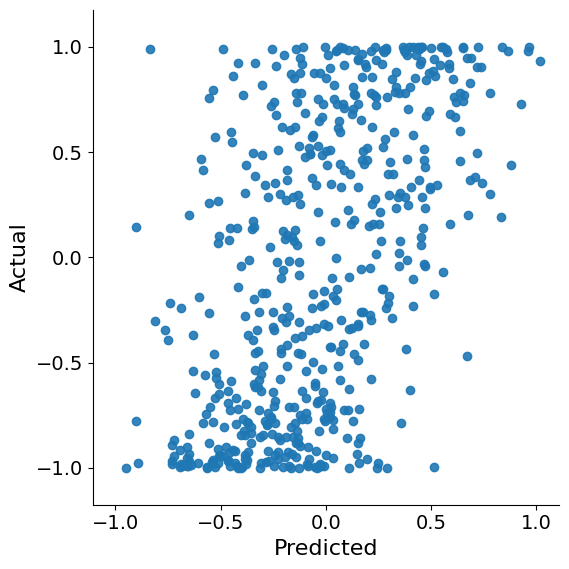

meta-llama/Llama-2-7b-chat-hf
cube 0.8424282430556783 [16, 22]


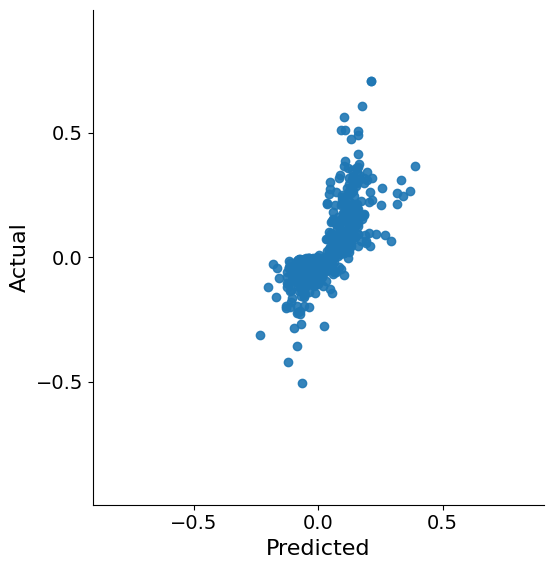

In [26]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

warnings.simplefilter("ignore")
os.environ["PYTHONWARNINGS"] = "ignore"  # Also affects subprocesses

def compare_probes(transform_type):
    for model_name in ['meta-llama/Llama-2-7b-chat-hf']:
        print(model_name)
        features, labels = pickle.load(open(f"./results_replication/{model_name.replace('/','_')}_politician_features.pkl", 'rb'))
        if transform_type == 'random':
            labels = np.random.permutation(labels)
        elif transform_type == 'sin':
            labels = np.sin(labels * 10)
        elif transform_type == 'cube':
            labels = np.power(labels, 3)
        kf = KFold(n_splits=2, shuffle=True, random_state=42)
        max_performance = 0
        max_ij = []
        for i in range(32):
            for j in range(32):
                performance = 0
                for train_indices, test_indices in kf.split(range(features.shape[0])):
                    X_train = features[train_indices, 0, i, j, :]
                    X_test = features[test_indices, 0, i, j, :]
                    y_train = labels[train_indices]
                    y_test = labels[test_indices]

                    probe_model = Ridge(alpha=1, fit_intercept=False)
                    probe_model.fit(X_train, y_train)
                    y_pred = probe_model.predict(X_test)
                    performance += spearmanr(y_test, y_pred).statistic
                if max_performance < performance / 2:
                    max_performance = performance / 2
                    max_ij = [i, j]

        print(transform_type, max_performance, max_ij)

        predicted = np.zeros(labels.shape)
        i, j = max_ij
        actual = labels

        for train_indices, test_indices in kf.split(range(features.shape[0])):
            X_train = features[train_indices, 0, i, j, :]
            X_test = features[test_indices, 0, i, j, :]
            y_train = labels[train_indices]
            y_test = labels[test_indices]

            mlp_model = Ridge(alpha=1, fit_intercept=False)
            mlp_model.fit(X_train, y_train)
            predicted[test_indices] = mlp_model.predict(X_test)

        # Plot with 1:1 aspect ratio, 90% opacity, larger fonts, and no top/right bars
        plt.figure(figsize=(6, 6))  # Keep figure square
        plt.scatter(predicted, actual, alpha=0.9)  # 90% opacity
        plt.axis("equal")  # Ensures 1:1 aspect ratio

        # Labels and title with larger font
        plt.xlabel("Predicted", fontsize=16)
        plt.ylabel("Actual", fontsize=16)
        plt.title("", fontsize=18)

        # Remove top and right spines
        ax = plt.gca()
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

        # Increase tick font size
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        # Set x and y axis limits to [-1.5,1.5]
        if transform_type != 'cube':
            plt.xlim(-1.1, 1.1)
            plt.ylim(-1.1, 1.1)
        
        # Set y-axis ticks from -1.5 to 1.5
        plt.yticks(np.arange(-1, 1.1, 0.5))  # Tick marks at intervals of 0.5
        plt.xticks(np.arange(-1, 1.1, 0.5))  # Ensure consistent x-axis ticks
        plt.tight_layout()
        plt.savefig(f'./llama2_linearity_{transform_type}.pdf')
        plt.show()

for transform_type in ['original', 'random', 'sin', 'cube']:
    compare_probes(transform_type)


# Figure 4

In [60]:
import pandas as pd
df = pd.read_parquet('./results_replication/intervention.parquet')

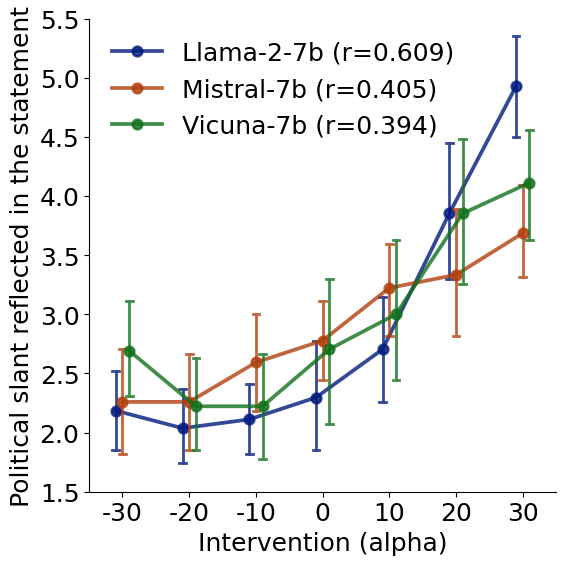

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(6,6))
df['model2'] = df['model'].replace({'mistral': 'Mistral-7b (r=0.405)', 'vicuna': 'Vicuna-7b (r=0.394)', 'llama2': 'Llama-2-7b (r=0.609)'})
df = df.sort_values('model2')
sns.set_palette("dark")
sns.pointplot(x='alpha', y='ideology', hue='model2', data=df.loc[df.k >= 64], ci=95, alpha=0.8, dodge=0.2, errwidth=2, capsize=0.1)

# Remove title
plt.title('')

# Axis labels
plt.ylabel('Political slant reflected in the statement')
plt.xlabel('Intervention (alpha)')

# Remove plot spines (the borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.ylim(1.5, 5.5)

# Remove legend boundary
plt.legend(title='', fontsize='medium', frameon=False)
plt.tight_layout()
plt.savefig('fig_intervention_model.pdf')
plt.show()


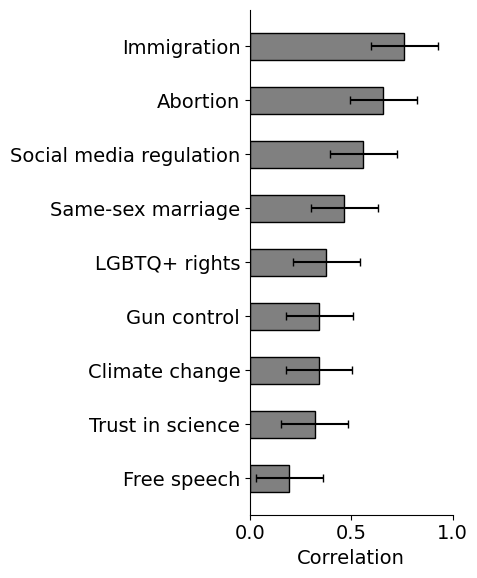

In [61]:
import scipy.stats as stats
plt.rcParams.update({'font.size': 14})

df = df.loc[pd.notnull(df.ideology)]
df['topic2'] = df.topic
df.loc[df.topic != 'LGBTQ+ rights', 'topic2'] = df.loc[df.topic != 'LGBTQ+ rights', 'topic'].apply(lambda x: str(x).capitalize())

# Function to compute correlation and 95% CI for each group in 'topic'
def correlation_with_ci(df, group_column, x, y):
    results = []
    for name, group in df.groupby(group_column):
        corr, _ = stats.pearsonr(group[x], group[y])
        # 95% CI
        n = len(group)
        stderr = 1.0 / (n - 3)**0.5  # standard error for correlation
        delta = stats.norm.ppf(0.975) * stderr
        lower_bound = corr - delta
        upper_bound = corr + delta
        results.append([name, corr, lower_bound, upper_bound])
    return pd.DataFrame(results, columns=[group_column, 'correlation', 'lower_ci', 'upper_ci'])

# Calculate correlations and 95% CIs
correlation_df = correlation_with_ci(df, 'topic2', 'alpha', 'ideology')

# Sort the correlation dataframe by the correlation values in descending order
correlation_df = correlation_df.sort_values(by='correlation', ascending=False)

# Plot the correlation values as a horizontal bar plot with 95% CI, now sorted
plt.figure(figsize=(5, 6))

# Create a horizontal bar plot
sns.barplot(y='topic2', x='correlation', width=0.5, data=correlation_df, ci=None, color="gray", edgecolor="black")

# Add error bars for 95% CI
plt.errorbar(y=correlation_df['topic2'], x=correlation_df['correlation'],
             xerr=[correlation_df['correlation'] - correlation_df['lower_ci'],
                   correlation_df['upper_ci'] - correlation_df['correlation']],
             fmt='none', capsize=3, color='black')

# Customize the plot
plt.xlabel('Correlation')
plt.ylabel('')  # No need for y-axis label since it's the topics
plt.title('')

# Adjust limits and other aesthetic customizations
plt.xlim(0, 1)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Ensure everything fits well
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('fig_intervention_bytopic.pdf')

# Show the plot
plt.show()



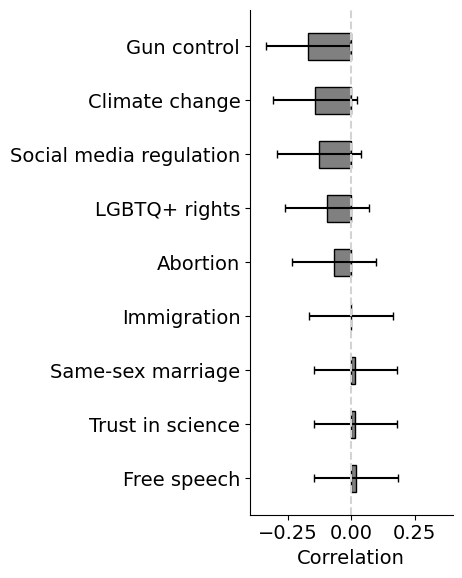

In [62]:
import scipy.stats as stats
plt.rcParams.update({'font.size': 14})

df = df.loc[pd.notnull(df.ideology)]
df['topic2'] = df.topic
df.loc[df.topic != 'LGBTQ+ rights', 'topic2'] = df.loc[df.topic != 'LGBTQ+ rights', 'topic'].apply(lambda x: str(x).capitalize())

# Function to compute correlation and 95% CI for each group in 'topic'
def correlation_with_ci(df, group_column, x, y):
    results = []
    for name, group in df.groupby(group_column):
        corr, _ = stats.pearsonr(group[x], group[y])
        # 95% CI
        n = len(group)
        stderr = 1.0 / (n - 3)**0.5  # standard error for correlation
        delta = stats.norm.ppf(0.975) * stderr
        lower_bound = corr - delta
        upper_bound = corr + delta
        results.append([name, corr, lower_bound, upper_bound])
    return pd.DataFrame(results, columns=[group_column, 'correlation', 'lower_ci', 'upper_ci'])

# Calculate correlations and 95% CIs
correlation_df = correlation_with_ci(df, 'topic2', 'alpha', 'length')

# Sort the correlation dataframe by the correlation values in descending order
correlation_df = correlation_df.sort_values(by='correlation', ascending=True)

# Plot the correlation values as a horizontal bar plot with 95% CI, now sorted
plt.figure(figsize=(5, 6))

# Create a horizontal bar plot
sns.barplot(y='topic2', x='correlation', width=0.5, data=correlation_df, ci=None, color="gray", edgecolor="black")

# Add error bars for 95% CI
plt.errorbar(y=correlation_df['topic2'], x=correlation_df['correlation'],
             xerr=[correlation_df['correlation'] - correlation_df['lower_ci'],
                   correlation_df['upper_ci'] - correlation_df['correlation']],
             fmt='none', capsize=3, color='black')

# Customize the plot
plt.xlabel('Correlation')
plt.ylabel('')  # No need for y-axis label since it's the topics
plt.title('')

# Adjust limits and other aesthetic customizations
plt.xlim(-0.4, .4)
plt.grid(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.axvline(0, color='lightgray', linestyle='--')

# Ensure everything fits well
plt.tight_layout()

# Save the figure as a PDF
plt.savefig('fig_intervention_lengthbytopic.pdf')

# Show the plot
plt.show()



# Figure A5

In [31]:
import pandas as pd
df = pd.read_parquet('./results_replication/intervention.parquet')

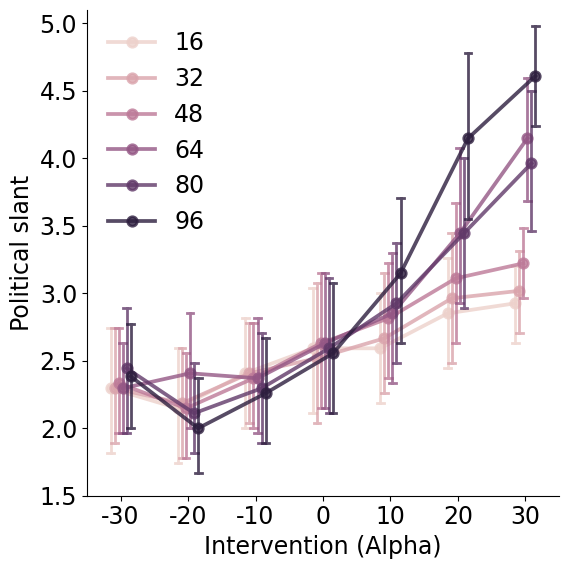

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.pointplot(x='alpha', y='ideology', hue='k', data=df, ci=95, alpha=0.8, dodge=0.3, errwidth=2, capsize=0.1)

# Remove title
plt.title('')

# Axis labels
plt.ylabel('Political slant')
plt.xlabel('Intervention (Alpha)')

# Remove plot spines (the borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.ylim(1.5, 5.1)

# Remove legend boundary
plt.legend(title='', frameon=False)
plt.tight_layout()
plt.savefig('fig_intervention_k.pdf')

plt.show()


# Figure A6

0.14260751068273908 0.6486157753741245 3054144
0.04751775518370327 0.356366620958403 2393184
0.05407287692256455 0.3493056163825435 3662688


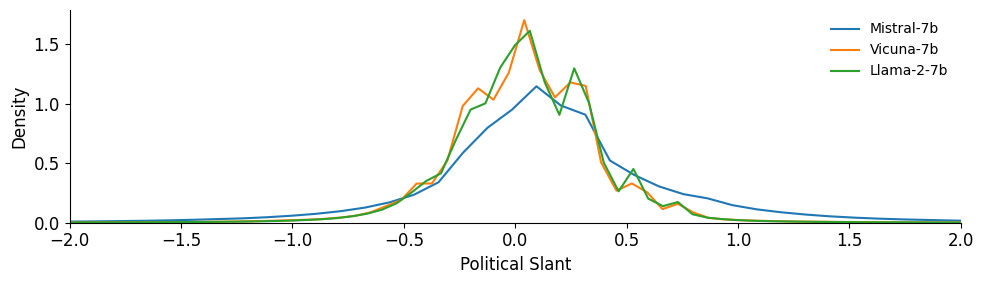

In [56]:
import matplotlib.pyplot as plt
import numpy as np
from seaborn import kdeplot

# Create a horizontally long figure
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(10, 3))

# Set x-axis range to -2 to 2
x_range = [-2, 2]

# Plot the KDEs for each dataset
m1 = pickle.load(open('./results_replication/mistralai_Mistral-7B-Instruct-v0.1_tokens.pkl', 'rb'))
m2 = pickle.load(open('./results_replication/lmsys_vicuna-7b-v1.5_tokens.pkl', 'rb'))
m3 = pickle.load(open('./results_replication/meta-llama_Llama-2-7b-chat-hf_tokens.pkl', 'rb'))
kdeplot(m1, label='Mistral-7b')
kdeplot(m2, label='Vicuna-7b')
kdeplot(m3, label='Llama-2-7b')
print(np.mean(m1), np.std(m1), len(m1))
print(np.mean(m2), np.std(m2), len(m2))
print(np.mean(m3), np.std(m3), len(m3))


# Set x-axis limit
plt.xlim(x_range)

# Add labels and title
plt.xlabel('Political Slant')
plt.ylabel('Density')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('')

# Show legend at the right without border
plt.legend(fontsize='small', frameon=False) #, bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False

# Show the plot
plt.tight_layout()  # Adjust layout to fit legend properly
plt.show()


# Figure A7

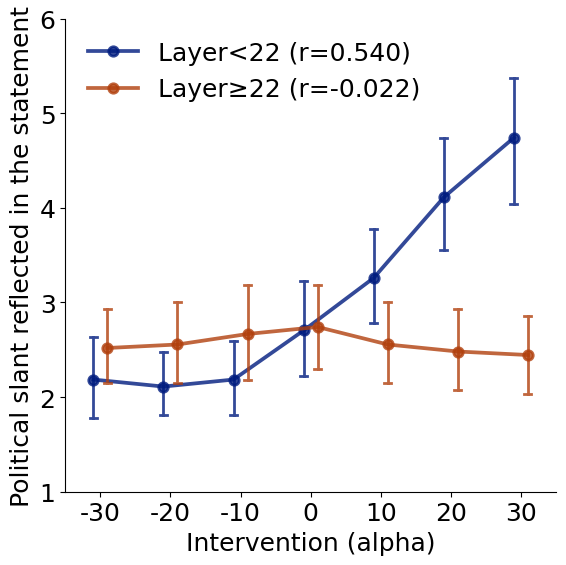

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
df = pd.read_parquet('./results_replication/selective.parquet')
#df = df.loc[df.model == 'meta-llama/Llama-2-7b-chat-hf']


plt.figure(figsize=(6,6))
df['selected'] = df['selected'].replace({'<22': f"Layer<22 (r=0.540)", '>=22': f"Layer≥22 (r=-0.022)"})
df['model2'] = df['model'].replace({'mistral': 'Mistral-7b (r=0.405)', 'vicuna': 'Vicuna-7b (r=0.394)', 'llama2': 'Llama-2-7b (r=0.609)'})
df = df.sort_values('model2')
sns.set_palette("dark")
sns.pointplot(x='alpha', y='ideology', hue='selected', data=df.loc[df.k >= 64], ci=95, alpha=0.8, dodge=0.2, errwidth=2, capsize=0.1)

# Remove title
plt.title('')

# Axis labels
plt.ylabel('Political slant reflected in the statement')
plt.xlabel('Intervention (alpha)')

# Remove plot spines (the borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)
plt.ylim(1, 6)

# Remove legend boundary
plt.legend(title='', fontsize='medium', frameon=False)
plt.tight_layout()
plt.savefig('fig_intervention_model.pdf')
plt.show()


# Figure A8

In [45]:
df = pd.read_parquet('./results_replication/intervention_coherent.parquet')

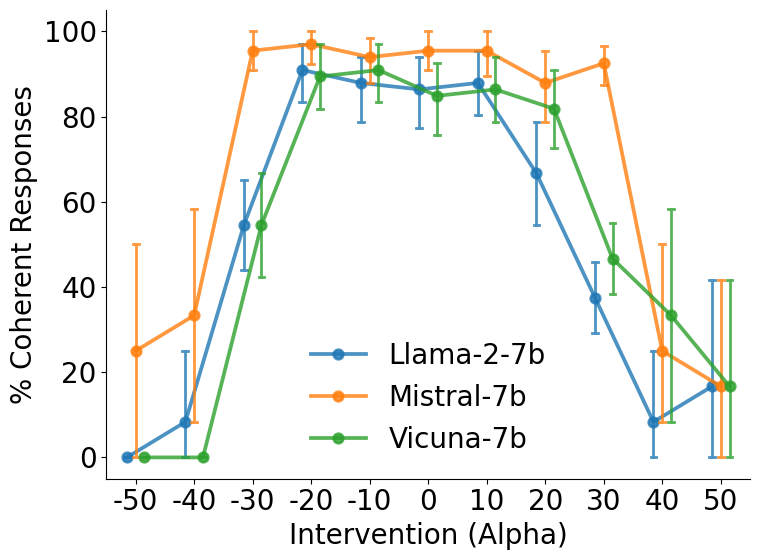

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})
df['model2'] = df['model'].replace({'mistral': 'Mistral-7b', 'vicuna': 'Vicuna-7b', 'llama2': 'Llama-2-7b'})
df['coherent2'] = df.coherent * 100
df = df.sort_values('model2')

plt.figure(figsize=(8,6))
sns.pointplot(x='alpha', y='coherent2', hue='model2', data=df, ci=95, alpha=0.8, dodge=0.3, errwidth=2, capsize=0.1)

# Remove title
plt.title('')

# Axis labels
plt.ylabel('% Coherent Responses')
plt.xlabel('Intervention (Alpha)')

# Remove plot spines (the borders)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(True)
plt.gca().spines['bottom'].set_visible(True)

# Remove legend boundary
plt.legend(title='', frameon=False)
plt.tight_layout()
plt.show()

# Figure A10


0.8441778015099906


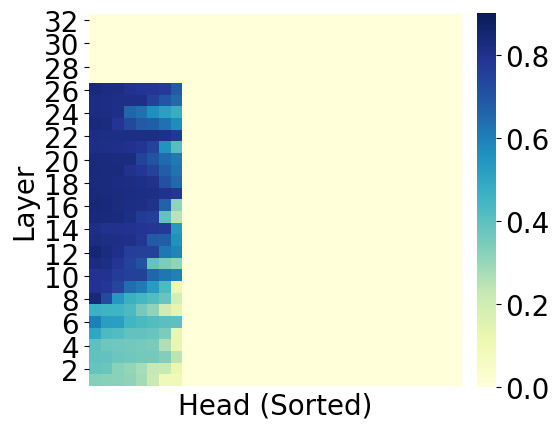

Top accuracy heads
[[11  5]
 [15  7]
 [ 7  3]
 [14  5]
 [15  4]
 [14  4]
 [22  1]
 [16  0]
 [18  0]
 [25  6]
 [19  7]
 [17  1]
 [19  4]
 [18  2]
 [14  2]
 [18  3]
 [17  5]
 [16  5]
 [22  0]
 [16  1]]
Top accuracy
[0.8441778  0.84142083 0.84069794 0.83900232 0.83585779 0.83292988
 0.8322722  0.83144844 0.8306592  0.82983344 0.82938666 0.82923726
 0.82919445 0.82918804 0.82903735 0.82839552 0.82744675 0.82734102
 0.8248269  0.82465154]


In [68]:
cnt = 0
model_name = ''
print(model_name)
performance = pickle.load(open(f"./results_replication/google_gemma-2-2b_politician_performance.pkl", 'rb'))
print(performance.max())
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(6, 6))
norm = mcolors.Normalize(vmin=0, vmax=.9)
plt.imshow(np.sort(performance[::-1, :]*(-1), axis=1)*(-1), cmap='YlGnBu', norm=norm)
plt.grid(False)
plt.xlabel("Head (Sorted)")
plt.ylabel("Layer")
plt.xticks([])
plt.yticks(range(0,32,2), [i for i in range(32,0,-2)])
cbar = plt.colorbar(orientation='vertical', fraction=0.0459, pad=0.04)
cbar.outline.set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.tight_layout()
plt.savefig(f"./figure_replication/{model_name.replace('/','_')}_layer_head_accuracy.pdf")
plt.show()

print("Top accuracy heads")
top_indices = np.dstack(np.unravel_index(np.argsort(performance.ravel()), (32, 32)))[0][-20:, :][::-1]
print(top_indices)
print("Top accuracy")
print(performance[top_indices[:, 0], top_indices[:, 1]])